In [64]:
import pandas as pd
import numpy as np
from tensorflow import keras

- 영화 리뷰 텍스트 데이터 , 가장 많이 사용되는 10000개 데이터 추출

In [65]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [66]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [67]:
word_index = imdb.get_word_index()

word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['UNK'] = 2 # unknown
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

- padding을 사용하여 변수의 길이를 맞춰준다.

In [68]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                      value = word_index['<PAD>'],
                                                      padding = 'post',
                                                      maxlen = 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, 
                                                      value = word_index['<PAD>'],
                                                      padding = 'post',
                                                      maxlen = 256)


In [69]:
vocab_size = 10000

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [71]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [72]:
history = model.fit(partial_x_train,
         partial_y_train,
         epochs = 40,
         batch_size = 512,
         validation_data=(x_val, y_val),
         verbose = 1)

Epoch 1/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6926 - accuracy: 0.5428 - val_loss: 0.6899 - val_accuracy: 0.6649
Epoch 2/40
30/30 [==============================] - 0s 17ms/step - loss: 0.6882 - accuracy: 0.6859 - val_loss: 0.6826 - val_accuracy: 0.7321
Epoch 3/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6786 - accuracy: 0.7094 - val_loss: 0.6685 - val_accuracy: 0.7469
Epoch 4/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6611 - accuracy: 0.7659 - val_loss: 0.6451 - val_accuracy: 0.7532
Epoch 5/40
30/30 [==============================] - 0s 16ms/step - loss: 0.6322 - accuracy: 0.7794 - val_loss: 0.6126 - val_accuracy: 0.7856
Epoch 6/40
30/30 [==============================] - 1s 20ms/step - loss: 0.5934 - accuracy: 0.8052 - val_loss: 0.5732 - val_accuracy: 0.8009
Epoch 7/40
30/30 [==============================] - 0s 16ms/step - loss: 0.5497 - accuracy: 0.8261 - val_loss: 0.5301 - val_accuracy: 0.8143
Epoch 8/40
30

In [73]:
result = model.evaluate(test_data, test_labels, verbose = 2)
result

782/782 - 1s - loss: 0.3270 - accuracy: 0.8728


[0.32703697681427, 0.8727999925613403]

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
import matplotlib.pyplot as plt

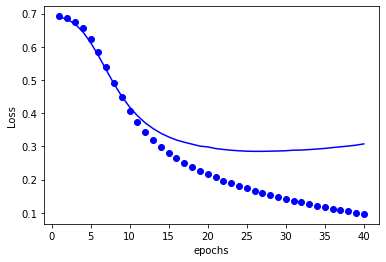

In [76]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
loss = history_dict['loss']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validataion loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

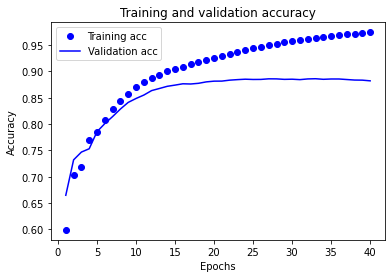

In [77]:
plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()